# Exercici - Regressió lineal múltiple - Preus Vivendes

## Introducció

Volem utilitzar la tècnica de Regressió lineal múltiple per predir el preu de les vivendes segons una sèrie d'atributs.
El dataset és [housing_prices.csv](housing_prices.csv)

* **price:** Preu de la vivenda en dollars
* **area:** Superfície de la vivenda en peus quadrats
* **bedrooms:** Nº de dormitoris
* **bathrooms:** Nº de banys
* **stories:** Les alçades que té la vivenda ([1,2,3,4]
* **mainroad:** Si es troba a la carretera principal o no
* **guestroom:** Si disposa d'habitació de convidats
* **basement:** Si disposa de soterrani o no
* **hotwaterheating:** Si disposa de sistema de calefacció i aigua calenta
* **airconditioning:** Si disposa d'aire acondicionat
* **parking:** Places de parking [0,1,2,3]
* **prefarea:** Indica si la vivenda es troba en el barri preferent de la ciutat
* **furnishingstatus:** Si està moblat o no ['furnished', 'semi-furnished', 'unfurnished']

## Objectiu

Utilitza les tècniques:
* Backward
* Fordward
* Bidireccional


Compara les diferents tècniques i justifica quina és la que ofereix millors resultats. **




In [24]:
# Importem numpy i pandas
import pandas as pd
import numpy as np 

# Visualització de les dades
from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns

## Exploració de dades

Realitza una exploració de les dades

In [25]:
data = pd.read_csv('housing_prices.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
data.shape

(545, 13)

### Detecctió d'outliers

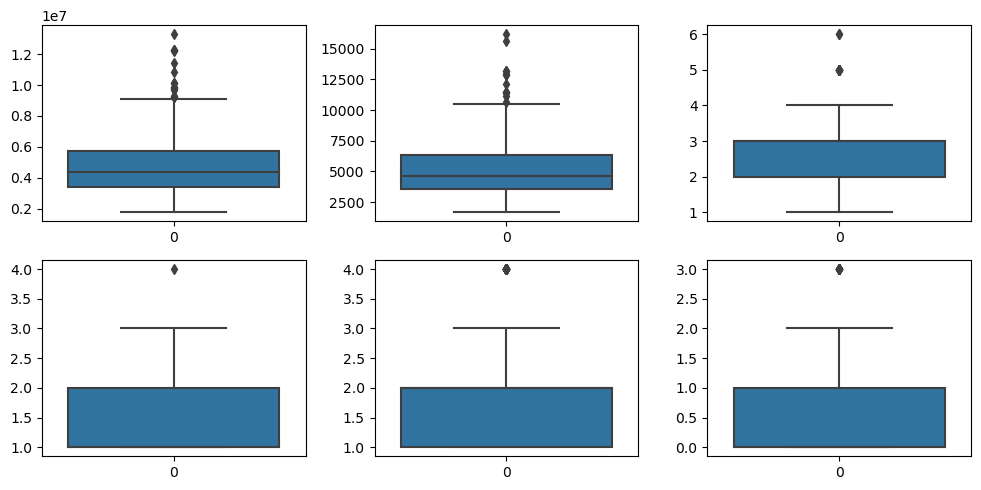

In [27]:
#Detectarem els outliers de les columnes numèriques

def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(data['price'], ax = axs[0,0])
    plt2 = sns.boxplot(data['area'], ax = axs[0,1])
    plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
    plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
    plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
    plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
    plot.tight_layout()
    
detectOutliers()

In [28]:
# Outlier reduction for price
#plot.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]
# Outlier reduction for area
#plot.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

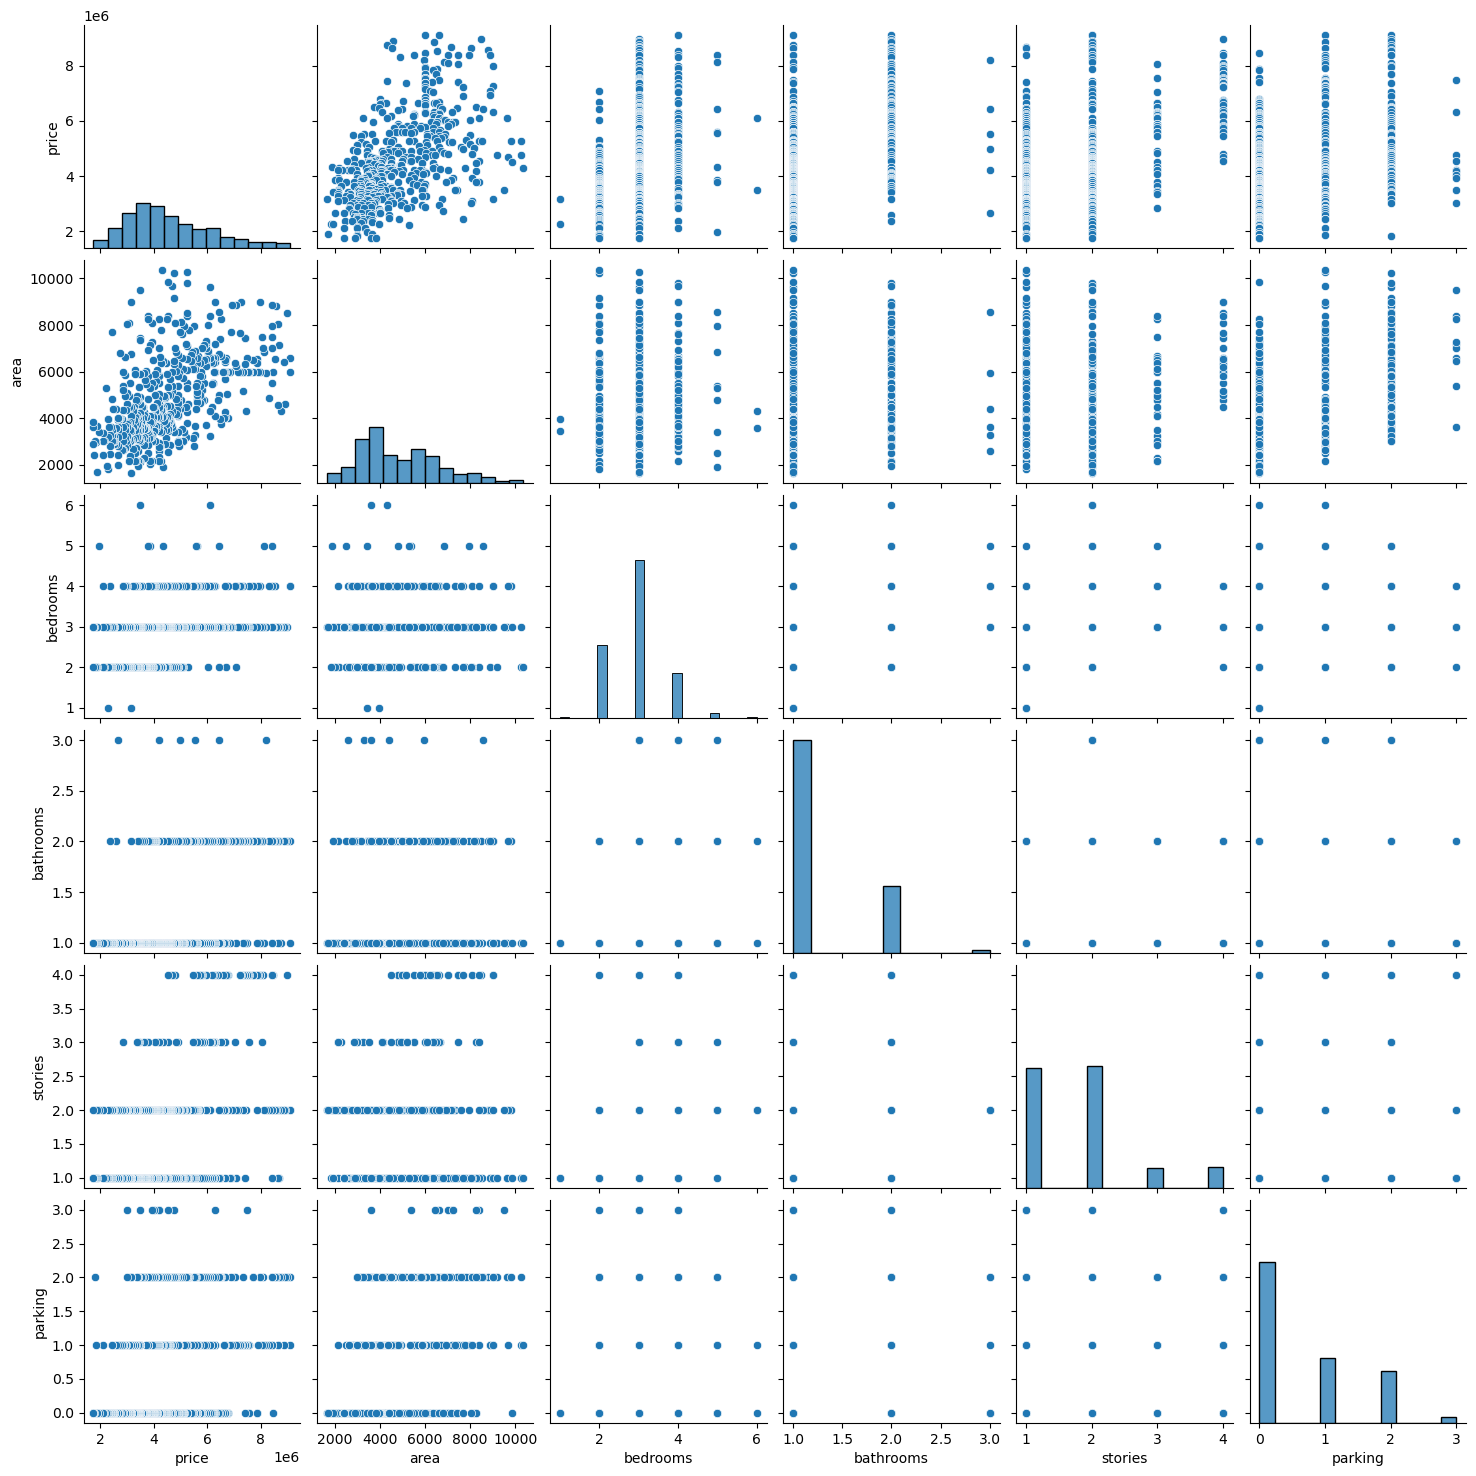

In [31]:
sns.pairplot(data)
plot.show()